# **Molecular Modeling Project Work: Computational Drug Discovery**
- In this Jupyter notebook, a machine learning model will be built using the ChEMBL bioactivity data.
### **Part_II - Exploratory Data Analysis**
 - Under this part, Descriptor Calculation and Exploratory Data Analysis will be performed.
>

## **Install conda and rdkit**

In [16]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-12-03 06:53:08--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   253MB/s    in 0.3s    

2024-12-03 06:53:09 (253 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

## **Load bioactivity data**

In [36]:
import pandas as pd

url = "https://raw.githubusercontent.com/Tegegne5/smTRG-Docking-Analysis/main/smTGR_bioactivity_IC50_preprocessed.csv"
df = pd.read_csv(url)

df


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL576624,N#Cc1c(-c2csc(-c3no[n+]([O-])c3C#N)c2)no[n+]1[O-],350,active
1,CHEMBL569420,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)s2)no[n+]1[O-],400,active
2,CHEMBL570121,N#Cc1c(-c2cc(F)cc(-c3no[n+]([O-])c3C#N)c2)no[n...,480,active
3,CHEMBL582970,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)cc2)no[n+]1...,1000,active
4,CHEMBL575013,N#Cc1c(-c2cccc(-c3no[n+]([O-])c3C#N)c2)no[n+]1...,3500,intermediate
5,CHEMBL576265,N#Cc1c(C(=O)c2cccs2)no[n+]1[O-],63,active
6,CHEMBL583780,N#Cc1c(-c2cccs2)no[n+]1[O-],3500,intermediate
7,CHEMBL565242,N#Cc1c(-c2ccco2)no[n+]1[O-],2800,intermediate
8,CHEMBL570132,N#Cc1c(-c2ccc(O)cc2)no[n+]1[O-],17900,inactive
9,CHEMBL576082,N#Cc1c(-c2ccc(-c3ccccc3)cc2)no[n+]1[O-],15800,inactive


In [37]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL576624,N#Cc1c(-c2csc(-c3no[n+]([O-])c3C#N)c2)no[n+]1[O-],350,active
1,CHEMBL569420,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)s2)no[n+]1[O-],400,active
2,CHEMBL570121,N#Cc1c(-c2cc(F)cc(-c3no[n+]([O-])c3C#N)c2)no[n...,480,active
3,CHEMBL582970,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)cc2)no[n+]1...,1000,active
4,CHEMBL575013,N#Cc1c(-c2cccc(-c3no[n+]([O-])c3C#N)c2)no[n+]1...,3500,intermediate
5,CHEMBL576265,N#Cc1c(C(=O)c2cccs2)no[n+]1[O-],63,active
6,CHEMBL583780,N#Cc1c(-c2cccs2)no[n+]1[O-],3500,intermediate
7,CHEMBL565242,N#Cc1c(-c2ccco2)no[n+]1[O-],2800,intermediate
8,CHEMBL570132,N#Cc1c(-c2ccc(O)cc2)no[n+]1[O-],17900,inactive
9,CHEMBL576082,N#Cc1c(-c2ccc(-c3ccccc3)cc2)no[n+]1[O-],15800,inactive


[link text](https://)## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [38]:
!pip install numpy
!pip install rdkit

     |████████████████████████████████| 29.5 MB 557 kB/s 


In [39]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [40]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [41]:
df_lipinski = lipinski(df.canonical_smiles)

In [42]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

import numpy as np
from rdkit import Chem # Import Chem within the function's scope
from rdkit.Chem import Descriptors, Lipinski

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    # Assuming 'pd' refers to pandas, import it if not already done
    import pandas as pd
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [43]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,302.231,0.06826,0.0,9.0
1,302.231,0.06826,0.0,9.0
2,314.192,0.14586,0.0,8.0
3,296.202,0.00676,0.0,8.0
4,296.202,0.00676,0.0,8.0
5,221.197,0.47218,0.0,6.0
6,193.187,0.90818,0.0,5.0
7,177.119,0.43968,0.0,5.0
8,203.157,0.55228,1.0,5.0
9,263.256,2.51368,0.0,4.0


In [44]:
from google.colab import data_table

In [45]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL576624,N#Cc1c(-c2csc(-c3no[n+]([O-])c3C#N)c2)no[n+]1[O-],350,active
1,CHEMBL569420,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)s2)no[n+]1[O-],400,active
2,CHEMBL570121,N#Cc1c(-c2cc(F)cc(-c3no[n+]([O-])c3C#N)c2)no[n...,480,active
3,CHEMBL582970,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)cc2)no[n+]1...,1000,active
4,CHEMBL575013,N#Cc1c(-c2cccc(-c3no[n+]([O-])c3C#N)c2)no[n+]1...,3500,intermediate
5,CHEMBL576265,N#Cc1c(C(=O)c2cccs2)no[n+]1[O-],63,active
6,CHEMBL583780,N#Cc1c(-c2cccs2)no[n+]1[O-],3500,intermediate
7,CHEMBL565242,N#Cc1c(-c2ccco2)no[n+]1[O-],2800,intermediate
8,CHEMBL570132,N#Cc1c(-c2ccc(O)cc2)no[n+]1[O-],17900,inactive
9,CHEMBL576082,N#Cc1c(-c2ccc(-c3ccccc3)cc2)no[n+]1[O-],15800,inactive


Now, let's combine the 2 DataFrame

In [46]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [47]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL576624,N#Cc1c(-c2csc(-c3no[n+]([O-])c3C#N)c2)no[n+]1[O-],350,active,302.231,0.06826,0.0,9.0
1,CHEMBL569420,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)s2)no[n+]1[O-],400,active,302.231,0.06826,0.0,9.0
2,CHEMBL570121,N#Cc1c(-c2cc(F)cc(-c3no[n+]([O-])c3C#N)c2)no[n...,480,active,314.192,0.14586,0.0,8.0
3,CHEMBL582970,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)cc2)no[n+]1...,1000,active,296.202,0.00676,0.0,8.0
4,CHEMBL575013,N#Cc1c(-c2cccc(-c3no[n+]([O-])c3C#N)c2)no[n+]1...,3500,intermediate,296.202,0.00676,0.0,8.0
5,CHEMBL576265,N#Cc1c(C(=O)c2cccs2)no[n+]1[O-],63,active,221.197,0.47218,0.0,6.0
6,CHEMBL583780,N#Cc1c(-c2cccs2)no[n+]1[O-],3500,intermediate,193.187,0.90818,0.0,5.0
7,CHEMBL565242,N#Cc1c(-c2ccco2)no[n+]1[O-],2800,intermediate,177.119,0.43968,0.0,5.0
8,CHEMBL570132,N#Cc1c(-c2ccc(O)cc2)no[n+]1[O-],17900,inactive,203.157,0.55228,1.0,5.0
9,CHEMBL576082,N#Cc1c(-c2ccc(-c3ccccc3)cc2)no[n+]1[O-],15800,inactive,263.256,2.51368,0.0,4.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [48]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [49]:
df_combined.standard_value.describe()

,standard_value
count,56.000000
mean,10150.535714
std,15904.651922
min,10.000000
25%,350.000000
50%,3500.000000
75%,9175.000000
max,50000.000000


In [50]:
-np.log10( (10**-9)* 100000000 )

1.0

In [51]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [52]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [53]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL576624,N#Cc1c(-c2csc(-c3no[n+]([O-])c3C#N)c2)no[n+]1[O-],active,302.231,0.06826,0.0,9.0,350
1,CHEMBL569420,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)s2)no[n+]1[O-],active,302.231,0.06826,0.0,9.0,400
2,CHEMBL570121,N#Cc1c(-c2cc(F)cc(-c3no[n+]([O-])c3C#N)c2)no[n...,active,314.192,0.14586,0.0,8.0,480
3,CHEMBL582970,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)cc2)no[n+]1...,active,296.202,0.00676,0.0,8.0,1000
4,CHEMBL575013,N#Cc1c(-c2cccc(-c3no[n+]([O-])c3C#N)c2)no[n+]1...,intermediate,296.202,0.00676,0.0,8.0,3500
5,CHEMBL576265,N#Cc1c(C(=O)c2cccs2)no[n+]1[O-],active,221.197,0.47218,0.0,6.0,63
6,CHEMBL583780,N#Cc1c(-c2cccs2)no[n+]1[O-],intermediate,193.187,0.90818,0.0,5.0,3500
7,CHEMBL565242,N#Cc1c(-c2ccco2)no[n+]1[O-],intermediate,177.119,0.43968,0.0,5.0,2800
8,CHEMBL570132,N#Cc1c(-c2ccc(O)cc2)no[n+]1[O-],inactive,203.157,0.55228,1.0,5.0,17900
9,CHEMBL576082,N#Cc1c(-c2ccc(-c3ccccc3)cc2)no[n+]1[O-],inactive,263.256,2.51368,0.0,4.0,15800


In [54]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,56.000000
mean,10150.535714
std,15904.651922
min,10.000000
25%,350.000000
50%,3500.000000
75%,9175.000000
max,50000.000000


In [55]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL576624,N#Cc1c(-c2csc(-c3no[n+]([O-])c3C#N)c2)no[n+]1[O-],active,302.231,0.06826,0.0,9.0,6.455932
1,CHEMBL569420,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)s2)no[n+]1[O-],active,302.231,0.06826,0.0,9.0,6.397940
2,CHEMBL570121,N#Cc1c(-c2cc(F)cc(-c3no[n+]([O-])c3C#N)c2)no[n...,active,314.192,0.14586,0.0,8.0,6.318759
3,CHEMBL582970,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)cc2)no[n+]1...,active,296.202,0.00676,0.0,8.0,6.000000
4,CHEMBL575013,N#Cc1c(-c2cccc(-c3no[n+]([O-])c3C#N)c2)no[n+]1...,intermediate,296.202,0.00676,0.0,8.0,5.455932
5,CHEMBL576265,N#Cc1c(C(=O)c2cccs2)no[n+]1[O-],active,221.197,0.47218,0.0,6.0,7.200659
6,CHEMBL583780,N#Cc1c(-c2cccs2)no[n+]1[O-],intermediate,193.187,0.90818,0.0,5.0,5.455932
7,CHEMBL565242,N#Cc1c(-c2ccco2)no[n+]1[O-],intermediate,177.119,0.43968,0.0,5.0,5.552842
8,CHEMBL570132,N#Cc1c(-c2ccc(O)cc2)no[n+]1[O-],inactive,203.157,0.55228,1.0,5.0,4.747147
9,CHEMBL576082,N#Cc1c(-c2ccc(-c3ccccc3)cc2)no[n+]1[O-],inactive,263.256,2.51368,0.0,4.0,4.801343


In [56]:
selection = ['molecule_chembl_id','canonical_smiles','bioactivity_class','MW','LogP','NumHDonors','NumHAcceptors','pIC50']
df3 = df_final[selection]
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL576624,N#Cc1c(-c2csc(-c3no[n+]([O-])c3C#N)c2)no[n+]1[O-],active,302.231,0.06826,0.0,9.0,6.455932
1,CHEMBL569420,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)s2)no[n+]1[O-],active,302.231,0.06826,0.0,9.0,6.397940
2,CHEMBL570121,N#Cc1c(-c2cc(F)cc(-c3no[n+]([O-])c3C#N)c2)no[n...,active,314.192,0.14586,0.0,8.0,6.318759
3,CHEMBL582970,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)cc2)no[n+]1...,active,296.202,0.00676,0.0,8.0,6.000000
4,CHEMBL575013,N#Cc1c(-c2cccc(-c3no[n+]([O-])c3C#N)c2)no[n+]1...,intermediate,296.202,0.00676,0.0,8.0,5.455932
5,CHEMBL576265,N#Cc1c(C(=O)c2cccs2)no[n+]1[O-],active,221.197,0.47218,0.0,6.0,7.200659
6,CHEMBL583780,N#Cc1c(-c2cccs2)no[n+]1[O-],intermediate,193.187,0.90818,0.0,5.0,5.455932
7,CHEMBL565242,N#Cc1c(-c2ccco2)no[n+]1[O-],intermediate,177.119,0.43968,0.0,5.0,5.552842
8,CHEMBL570132,N#Cc1c(-c2ccc(O)cc2)no[n+]1[O-],inactive,203.157,0.55228,1.0,5.0,4.747147
9,CHEMBL576082,N#Cc1c(-c2ccc(-c3ccccc3)cc2)no[n+]1[O-],inactive,263.256,2.51368,0.0,4.0,4.801343


In [57]:
df3.to_csv('smTGR_bioactivity_IC50_pIC50_curated_preprocessed.csv')

In [58]:
df_final.pIC50.describe()

,pIC50
count,56.000000
mean,5.647095
std,0.942153
min,4.301030
25%,5.037957
50%,5.455932
75%,6.455932
max,8.000000


### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [59]:
df_active_inactive = df_final[df_final['bioactivity_class'] != 'intermediate']

In [60]:
# Reset the index to have a continuous sequence starting from 1
df_active_inactive.reset_index(drop=True, inplace=True)
df_active_inactive.index = df_active_inactive.index + 1

In [61]:
# Save the filtered DataFrame to a new CSV file with the preferred name
df_active_inactive.to_csv('smTGR_bioactivity_filtered.csv', index=False)

In [62]:
df_active_inactive

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL576624,N#Cc1c(-c2csc(-c3no[n+]([O-])c3C#N)c2)no[n+]1[O-],active,302.231,0.06826,0.0,9.0,6.455932
2,CHEMBL569420,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)s2)no[n+]1[O-],active,302.231,0.06826,0.0,9.0,6.397940
3,CHEMBL570121,N#Cc1c(-c2cc(F)cc(-c3no[n+]([O-])c3C#N)c2)no[n...,active,314.192,0.14586,0.0,8.0,6.318759
4,CHEMBL582970,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)cc2)no[n+]1...,active,296.202,0.00676,0.0,8.0,6.000000
5,CHEMBL576265,N#Cc1c(C(=O)c2cccs2)no[n+]1[O-],active,221.197,0.47218,0.0,6.0,7.200659
6,CHEMBL570132,N#Cc1c(-c2ccc(O)cc2)no[n+]1[O-],inactive,203.157,0.55228,1.0,5.0,4.747147
7,CHEMBL576082,N#Cc1c(-c2ccc(-c3ccccc3)cc2)no[n+]1[O-],inactive,263.256,2.51368,0.0,4.0,4.801343
8,CHEMBL574801,Cc1ccc(-c2no[n+]([O-])c2C#N)cc1,inactive,201.185,1.15510,0.0,4.0,4.950782
9,CHEMBL578810,COc1ccc(-c2no[n+]([O-])c2C#N)cc1,inactive,217.184,0.85528,0.0,5.0,5.000000
10,CHEMBL570345,O=C(c1cccs1)c1no[n+]([O-])c1C(=O)c1cccs1,active,306.324,1.89300,0.0,7.0,7.397940


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [63]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

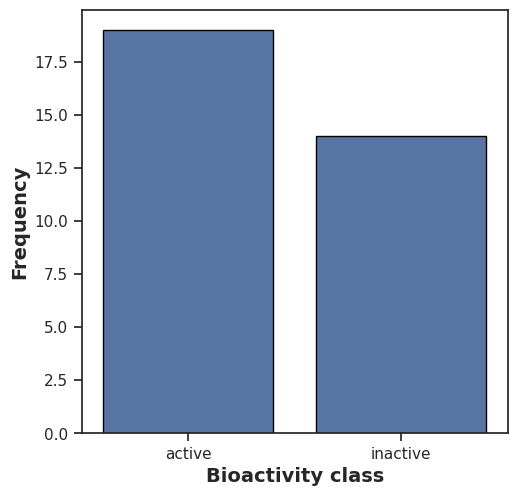

In [64]:
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='bioactivity_class', data=df_active_inactive, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('plot_bioactivity_class.jpg')
plt.show()

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

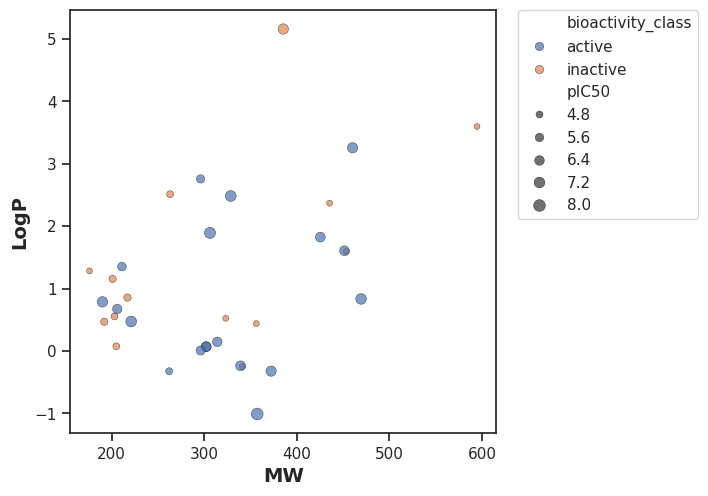

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_active_inactive, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.jpg')

### **Box plots**

#### **pIC50 value**

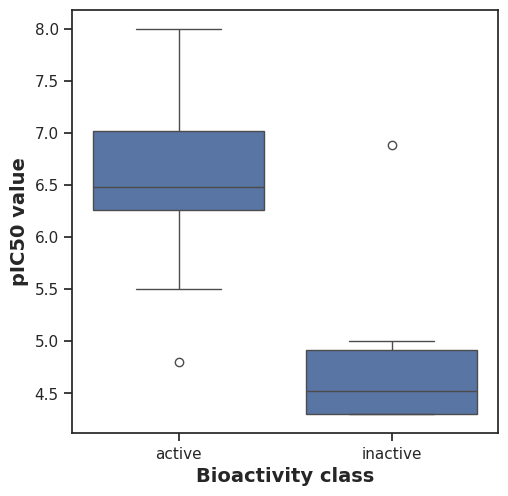

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_active_inactive)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.jpg')

**Statistical analysis | Mann-Whitney U Test**

In [67]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_active_inactive[selection]
  active = df_active_inactive[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_active_inactive[selection]
  inactive = df_active_inactive[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [68]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,249.5,0.000022,0.05,Different distribution (reject H0)


In [69]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu
  import pandas as pd # Import pandas

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df3[selection]
  active = df3[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df3[selection]
  inactive = df3[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

  # Check if active and inactive are empty and handle the case
  if active.empty or inactive.empty:
    print(f"Warning: Either active or inactive group is empty for descriptor: {descriptor}")
    return None # Or handle this case differently as needed

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

#### **MW**

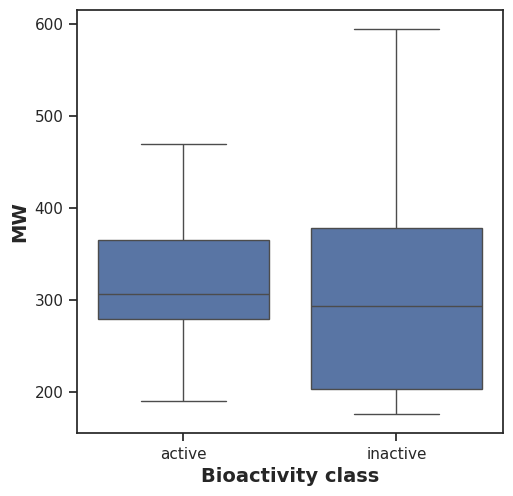

In [70]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_active_inactive)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.jpg')

In [71]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,150.0,0.547788,0.05,Same distribution (fail to reject H0)


#### **LogP**

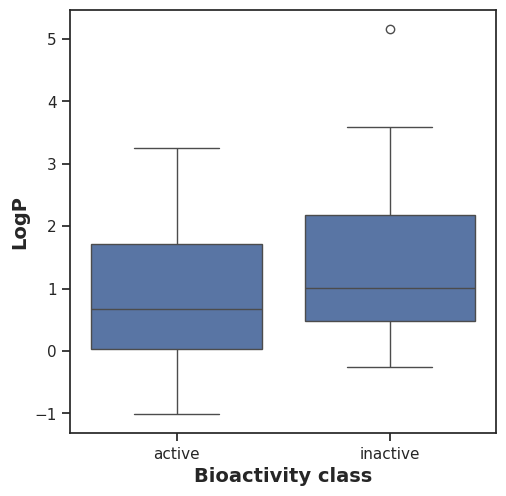

In [72]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_active_inactive)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.jpg')

**Statistical analysis | Mann-Whitney U Test**

In [73]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,102.0,0.266573,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

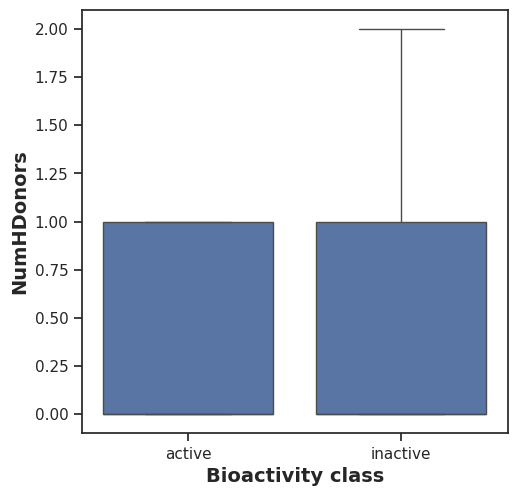

In [74]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_active_inactive)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.jpg')

**Statistical analysis | Mann-Whitney U Test**

In [75]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,115.0,0.448019,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

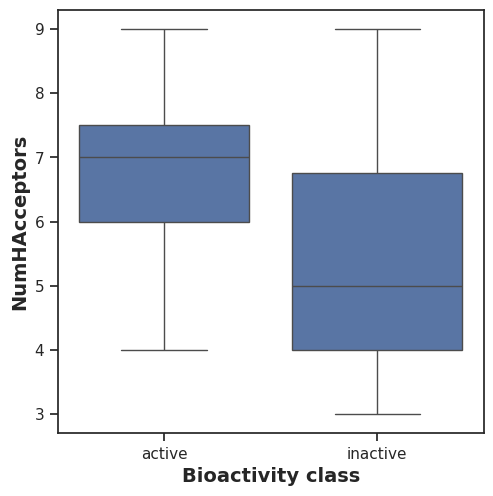

In [76]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_active_inactive)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.jpg')

In [77]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,189.5,0.037224,0.05,Different distribution (reject H0)


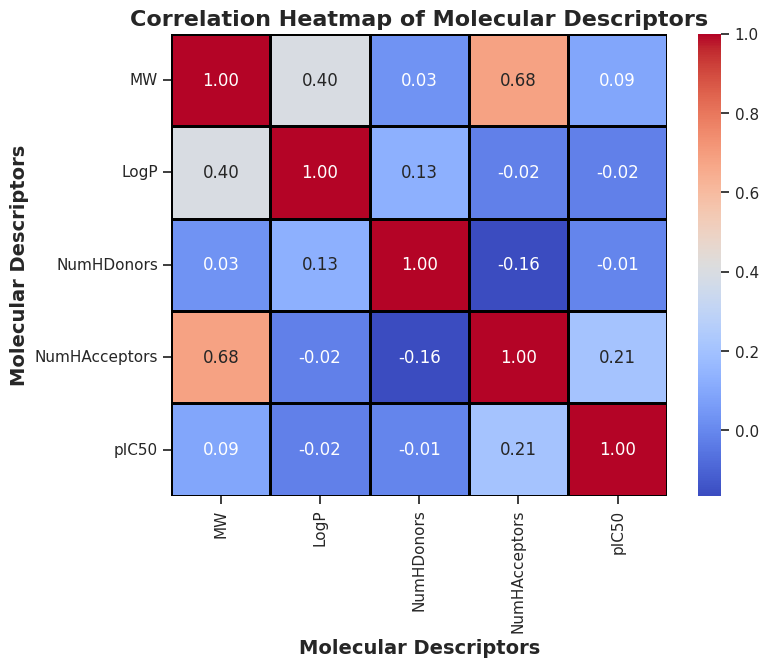

In [78]:
corr = df_active_inactive[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap of Molecular Descriptors', fontsize=16, fontweight='bold')
plt.xlabel('Molecular Descriptors', fontsize=14, fontweight='bold')
plt.ylabel('Molecular Descriptors', fontsize=14, fontweight='bold')
plt.savefig('correlation_heatmap_molecular_descriptors.jpg')
plt.show()

#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Filtering Out Inactive Compounds to Prepare Active Compound for SwissADME Analysis**

In [79]:
df_active = df_active_inactive[df_active_inactive['bioactivity_class'] != 'inactive']

In [80]:
df_active.reset_index(drop=True, inplace=True)
df_active.index = df_active.index + 1
df_active.to_csv('active_compounds.csv', index=False)

In [81]:
df_active

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL576624,N#Cc1c(-c2csc(-c3no[n+]([O-])c3C#N)c2)no[n+]1[O-],active,302.231,0.06826,0.0,9.0,6.455932
2,CHEMBL569420,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)s2)no[n+]1[O-],active,302.231,0.06826,0.0,9.0,6.397940
3,CHEMBL570121,N#Cc1c(-c2cc(F)cc(-c3no[n+]([O-])c3C#N)c2)no[n...,active,314.192,0.14586,0.0,8.0,6.318759
4,CHEMBL582970,N#Cc1c(-c2ccc(-c3no[n+]([O-])c3C#N)cc2)no[n+]1...,active,296.202,0.00676,0.0,8.0,6.000000
5,CHEMBL576265,N#Cc1c(C(=O)c2cccs2)no[n+]1[O-],active,221.197,0.47218,0.0,6.0,7.200659
6,CHEMBL570345,O=C(c1cccs1)c1no[n+]([O-])c1C(=O)c1cccs1,active,306.324,1.89300,0.0,7.0,7.397940
7,CHEMBL574577,O=C(O)c1c(-c2ccccc2)no[n+]1[O-],active,206.157,0.67320,1.0,4.0,6.200659
8,CHEMBL567637,O=Cc1c(-c2ccccc2)no[n+]1[O-],active,190.158,0.78750,0.0,4.0,6.958607
9,CHEMBL3322293,N#Cc1c(COc2ccc3c(c2)C2CN(C(=O)C4CCCCC4)CC(=O)N...,active,451.483,1.60698,0.0,7.0,6.455932
10,CHEMBL3322292,NC(=O)c1c(COc2ccc3c(c2)C2CN(C(=O)C4CCCCC4)CC(=...,active,469.498,0.83420,1.0,7.0,7.080922


## **Zip files**

In [82]:
# Save the SMILES for active compounds
df_active['canonical_smiles'].to_csv('active_compounds_smiles.smi', index=False, header=False)

## **Filtering and selecting small molecules using SwissADME parameters to ensure drug-like properties for subsequent PostDock analysis**

Here, small molecules were filtered based on their bioavailability radar appraisal parameters using SwissADME to ensure drug-like properties for further PostDock analysis


In [94]:
url = "https://raw.githubusercontent.com/Tegegne5/smTRG-Docking-Analysis/main/swissadme_analyzed_19compound.csv"
df = pd.read_csv(url)
df.columns


Index(['Molecule', 'Canonical SMILES', 'Formula', 'MW', '#Heavy atoms',
       '#Aromatic heavy atoms', 'Fraction Csp3', '#Rotatable bonds',
       '#H-bond acceptors', '#H-bond donors', 'MR', 'TPSA', 'iLOGP', 'XLOGP3',
       'WLOGP', 'MLOGP', 'Silicos-IT Log P', 'Consensus Log P', 'ESOL Log S',
       'ESOL Solubility (mg/ml)', 'ESOL Solubility (mol/l)', 'ESOL Class',
       'Ali Log S', 'Ali Solubility (mg/ml)', 'Ali Solubility (mol/l)',
       'Ali Class', 'Silicos-IT LogSw', 'Silicos-IT Solubility (mg/ml)',
       'Silicos-IT Solubility (mol/l)', 'Silicos-IT class', 'GI absorption',
       'BBB permeant', 'Pgp substrate', 'CYP1A2 inhibitor',
       'CYP2C19 inhibitor', 'CYP2C9 inhibitor', 'CYP2D6 inhibitor',
       'CYP3A4 inhibitor', 'log Kp (cm/s)', 'Lipinski #violations',
       'Ghose #violations', 'Veber #violations', 'Egan #violations',
       'Muegge #violations', 'Bioavailability Score', 'PAINS #alerts',
       'Brenk #alerts', 'Leadlikeness #violations', 'Synthetic Access

In [96]:
# Filter small molecules based on their physicochemical properties for bioavailability parameters as defined by the Bioavailability Radar in SwissADME
df = df.loc[(df['MW'] >= 150) & (df['MW'] <= 500)]
df = df.loc[(df['XLOGP3'] >= -0.7) & (df['XLOGP3'] <= 5.0)]
df = df.loc[(df['TPSA'] >= 20) & (df['TPSA'] <= 130)]
df = df.loc[(df['ESOL Log S'] > -6) & (df['ESOL Log S'] < 0)]
df = df.loc[(df['Fraction Csp3'] > 0.25) & (df['Fraction Csp3'] < 1)]
df = df.loc[(df['#Rotatable bonds'] > 0) & (df['#Rotatable bonds'] <=9)]
df.to_csv('ADME_clean_final.csv', index=False)
df

,Molecule,Canonical SMILES,Formula,MW,#Heavy atoms,#Aromatic heavy atoms,Fraction Csp3,#Rotatable bonds,#H-bond acceptors,#H-bond donors,...,Lipinski #violations,Ghose #violations,Veber #violations,Egan #violations,Muegge #violations,Bioavailability Score,PAINS #alerts,Brenk #alerts,Leadlikeness #violations,Synthetic Accessibility
8,Molecule 9,N#Cc1c(COc2ccc3c(c2)C2CN(CC(=O)N2CC3)C(=O)C2CC...,C23H25N5O5,451.48,33,11,0.52,5,7,0,...,0,0,0,0,0,0.55,0,1,1,4.25
10,Molecule 11,N#Cc1[n+]([O-])onc1C(=O)N1CC(=O)N2C(C1)c1ccccc...,C16H13N5O4,339.31,25,11,0.31,2,6,0,...,0,1,0,0,0,0.55,0,1,0,3.51
12,Molecule 13,COC(=O)c1[n+]([O-])onc1C(=O)N1CC(=O)N2C(C1)c1c...,C17H16N4O6,372.33,27,11,0.35,4,7,0,...,0,1,0,0,0,0.55,0,1,1,3.67
18,Molecule 19,CCOC(=O)C(C1=C(Br)C2=NOC3C2C(=C1)C(=O)c1c3cccc...,C21H18BrNO6,460.27,29,6,0.33,7,7,0,...,0,0,0,0,0,0.55,0,2,1,4.84


In [98]:
! zip -r Final_results_collection.zip . -i *.csv *.jpg

updating: swissadme_analyzed_19compound.csv (deflated 63%)
updating: plot_MW_vs_LogP.jpg (deflated 40%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
updating: plot_ic50.jpg (deflated 42%)
updating: plot_NumHDonors.jpg (deflated 44%)
updating: plot_NumHAcceptors.jpg (deflated 48%)
updating: smTGR_bioactivity_IC50_pIC50_curated_preprocessed.csv (deflated 71%)
updating: plot_LogP.jpg (deflated 47%)
updating: smTGR_bioactivity_filtered.csv (deflated 68%)
updating: correlation_heatmap_molecular_descriptors.jpg (deflated 23%)
updating: mannwhitneyu_MW.csv (deflated 8%)
updating: mannwhitneyu_pIC50.csv (deflated 9%)
updating: plot_bioactivity_class.jpg (deflated 48%)
updating: active_compounds.csv (deflated 64%)
updating: mannwhitneyu_LogP.csv (deflated 7%)
updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
updating: plot_MW.jpg (deflated 46%)
updating: ADME_clean_final.csv (deflated 53%)
